In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import sys
import os
import time

import numpy as np
from skimage.transform import resize

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from data_manager import *
from metadata import *
from conversion import images_to_volume

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Precision WorkStation


No vtk


In [2]:
# downsample = 1
# downsample = 32
# downsample = 8
# downsample=8 is the maximum. Exceeding it results in memory error.

In [3]:
# for stack in all_nissl_stacks:
# for stack in ['MD652', 'MD653', 'MD657', 'MD658']:
# for stack in ['MD585']:
for stack in ['ChatCryoJane201710']:
    
    first_sec, last_sec = metadata_cache['section_limits'][stack]
    
#     for downsample in [8, 32]:
    for downsample in [32]:

        images = {}
        for sec in metadata_cache['valid_sections'][stack]:
            print sec
            mask = DataManager.load_thumbnail_mask_v3(stack=stack, section=sec, prep_id=2)

            if downsample == 32:
                img_rgb = DataManager.load_image_v2(stack, section=sec, resol='thumbnail', prep_id=2, version='Ntb')
                img = img_as_ubyte(rgb2gray(img_rgb))
                img[~mask] = 0
            else:
                img_rgb = DataManager.load_image_v2(stack, section=sec, resol='lossless', prep_id=2, version='Ntb')
                if downsample == 1:
                    img = img_as_ubyte(rgb2gray(img_rgb)) 
                else:
                    img = img_as_ubyte(rgb2gray(img_rgb[::downsample, ::downsample]))
                    mask = resize(mask, img.shape[:2]).astype(np.bool)
                img[~mask] = 0

            images[sec-1] = img

        voxel_z_size = SECTION_THICKNESS/(XY_PIXEL_DISTANCE_LOSSLESS * downsample)

        volume, volume_bbox = images_to_volume(images=images, voxel_size=(1, 1, voxel_z_size), first_sec=first_sec-1, last_sec=last_sec-1)
    #     volume, volume_bbox = images_to_volume(images=images, voxel_size=(1, 1, voxel_z_size), first_sec=first_sec-1, last_sec=first_sec-1+10)
        print volume.shape

#         vol_fp = DataManager.get_intensity_volume_filepath(stack=stack, downscale=downsample)
#         create_if_not_exists(os.path.dirname(vol_fp))
#         bp.pack_ndarray_file(volume, vol_fp)
#         upload_to_s3(vol_fp)

#         bbox_fp = DataManager.get_intensity_volume_bbox_filepath(stack=stack, downscale=downsample)
#         np.savetxt(bbox_fp, np.array(volume_bbox, np.int)[None, :], fmt='%d')
#         upload_to_s3(bbox_fp)

1
2
3


/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide27-S1_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide27-S1_prep2_thumbnail_mask.png" "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide27-S1_prep2_thumbnail_mask.png"
80
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide

92
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide32-S1_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide32-S1_prep2_thumbnail_mask.png" "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide32-S1_prep2_thumbnail_mask.png"
93
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide31-S2_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCry

105
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide35-S2_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide35-S2_prep2_thumbnail_mask.png" "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide35-S2_prep2_thumbnail_mask.png"
106
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide36-S2_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatC

118
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide40-S2_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide40-S2_prep2_thumbnail_mask.png" "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide40-S2_prep2_thumbnail_mask.png"
119
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide39-S3_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatC

131
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide43-S3_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide43-S3_prep2_thumbnail_mask.png" "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide43-S3_prep2_thumbnail_mask.png"
132
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide44-S3_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatC

144
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide48-S3_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide48-S3_prep2_thumbnail_mask.png" "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide48-S3_prep2_thumbnail_mask.png"
145
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide49-S1_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatC

157
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide53-S1_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide53-S1_prep2_thumbnail_mask.png" "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide53-S1_prep2_thumbnail_mask.png"
158
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide54-S1_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatC

170
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide58-S1_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide58-S1_prep2_thumbnail_mask.png" "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide58-S1_prep2_thumbnail_mask.png"
171
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask/ChatCryoJane201710_slide57-S2_prep2_thumbnail_mask.png" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatC

In [5]:
display_image(volume[200,:,:])

/shared/MouseBrainAtlas/reconstruct/tmp.jpg

# Lossless resolution

In [67]:
# for stack in all_nissl_stacks:
# for stack in ['MD652', 'MD653', 'MD657', 'MD658']:
for stack in ['MD585']:
    
    first_sec, last_sec = metadata_cache['section_limits'][stack]
    
#     for downsample in [8, 32]:
    for downsample in [1]:

        images = {}
#         for sec in metadata_cache['valid_sections'][stack]:
        for sec in range(155, 175):
            if sec not in metadata_cache['valid_sections'][stack]:
                continue
            print sec
            mask = DataManager.load_thumbnail_mask_v3(stack=stack, section=sec, prep_id=2)

            if downsample == 32:
#                 img_rgb = DataManager.load_image(stack, section=sec, resol='thumbnail', version='cropped_tif')
                img_rgb = DataManager.load_image_v2(stack, section=sec, resol='thumbnail', prep_id=2)
                img = img_as_ubyte(rgb2gray(img_rgb))
                img[~mask] = 0
            else:
#                 img_rgb = DataManager.load_image(stack, section=sec, resol='lossless', version='cropped_gray')
                img_rgb = DataManager.load_image_v2(stack, section=sec, resol='lossless', prep_id=2)
                if downsample == 1:
                    img = img_as_ubyte(rgb2gray(img_rgb)) 
                else:
                    img = img_as_ubyte(rgb2gray(img_rgb[::downsample, ::downsample]))
                mask = resize(mask, img.shape[:2]).astype(np.bool)
                img[~mask] = 0

            images[sec-1] = img[7000:7000+1612, 1388:1388+2340].copy()
            del img, mask

        voxel_z_size = SECTION_THICKNESS/(XY_PIXEL_DISTANCE_LOSSLESS * downsample)

        volume, volume_bbox = images_to_volume(images=images, voxel_size=(1, 1, voxel_z_size), 
                                               first_sec=155, last_sec=175)
        print volume.shape

#         vol_fp = DataManager.get_intensity_volume_filepath(stack=stack, downscale=downsample)
#         create_if_not_exists(os.path.dirname(vol_fp))
#         bp.pack_ndarray_file(volume, vol_fp)
#         upload_to_s3(vol_fp)

#         bbox_fp = DataManager.get_intensity_volume_bbox_filepath(stack=stack, downscale=downsample)
#         np.savetxt(bbox_fp, np.array(volume_bbox, np.int)[None, :], fmt='%d')
#         upload_to_s3(bbox_fp)

155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
(1612, 2340, 915)


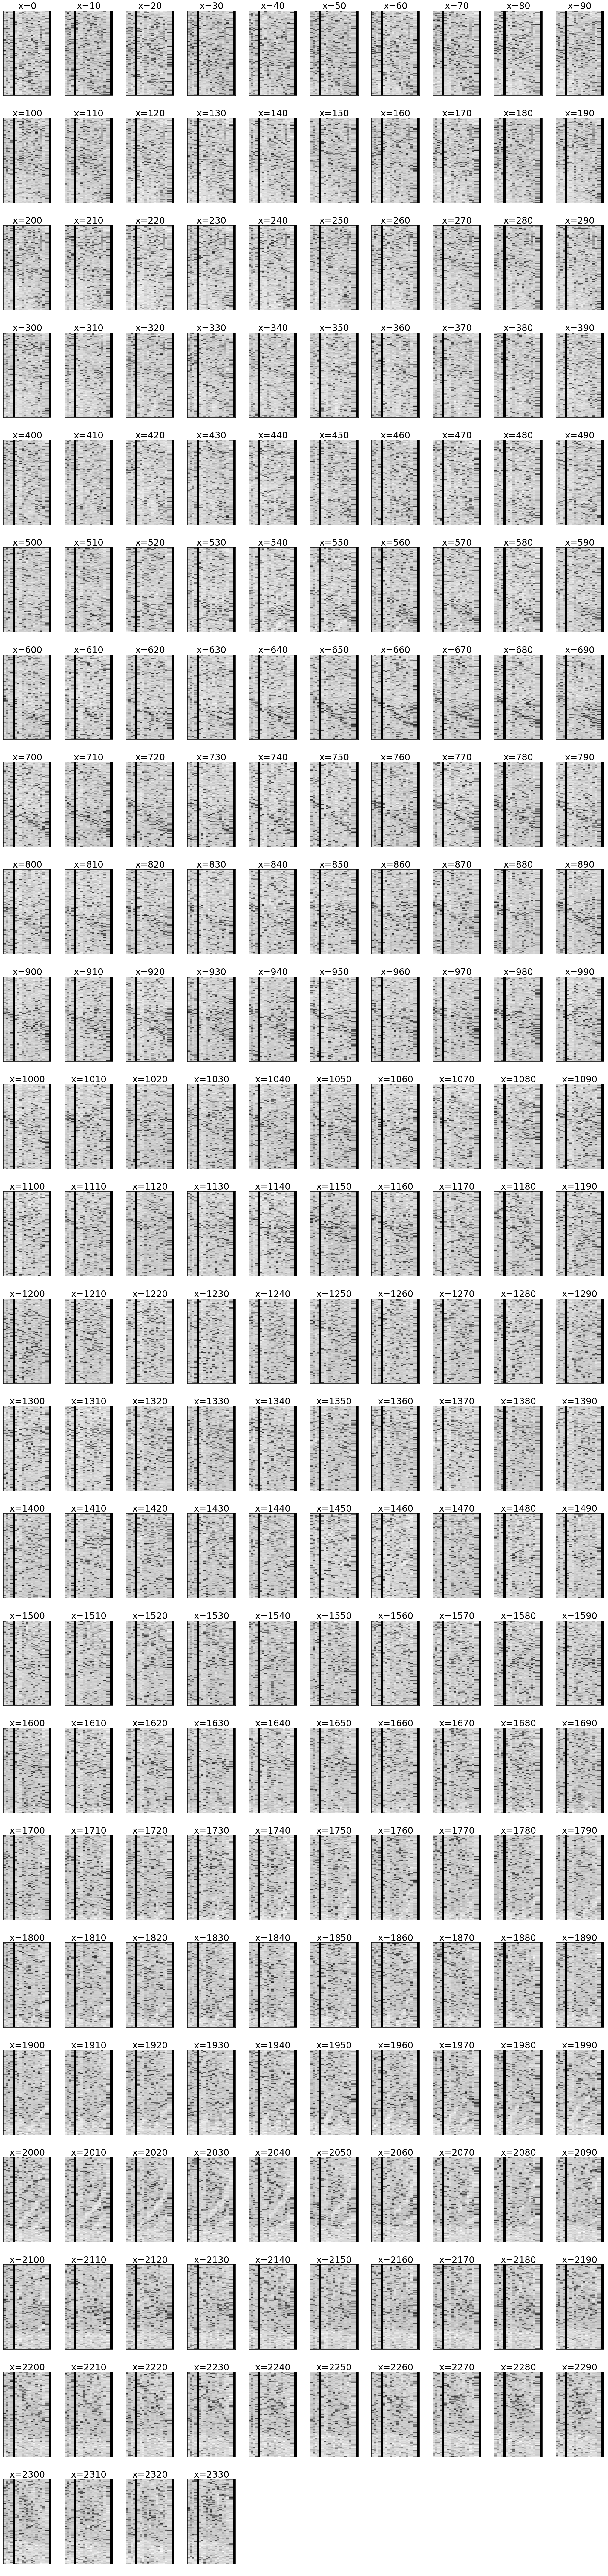

In [69]:
display_volume_sections(volume, every=10, cmap=plt.cm.gray, direction='x', ncols=10)